<a href="https://colab.research.google.com/github/nathaliadutra15/disc_mineracao_dados/blob/main/MINERACAO_DE_DADOS_05_10_NATHALIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração de Dados
### Atividade do dia 05/10/2024
---


1) BASE DE DADOS

Este conjunto de dados possui uma visão abrangente de diversos fatores que impactam o desempenho dos alunos em provas. Ele contém informações sobre hábitos de estudo, frequência, envolvimento dos pais e outros aspectos que influenciam o sucesso acadêmico.

Database obtido no Kaggle: https://www.kaggle.com/datasets/timothyadeyemi/student-performance/data

In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('StudentPerformanceFactors.csv')

df.head()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (1).csv


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


2) EXPLORAÇÃO DE DADOS

* Verifique a presença de valores nulos:

In [3]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


3) TRATAMENTO DOS DADOS FALTANTES

* Para valores categóricos, substitua por um valor padrão:

In [7]:
df['Teacher_Quality'].fillna('Medium', inplace=True)
df['Parental_Education_Level'].fillna('High School', inplace=True)
df['Distance_from_Home'].fillna('Near', inplace=True)

4) EXPLORAÇÃO ESTATÍSTICA DOS DADOS

* Estatísticas descritivas para variáveis numéricas:

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


* Frequência de valores para variáveis categóricas:

In [15]:
colunas = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities','Internet_Access', 'Family_Income', 'Teacher_Quality','School_Type', 'Peer_Influence', 'Learning_Disabilities','Parental_Education_Level', 'Gender']

for c in colunas:
    print(df[c].value_counts())
    print("\n")

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


School_Type
Public     4598
Private    2009
Name: count, dtype: int64


Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64


Parental_Education_Level
High School     3313
College         1989
Postgraduate    1305
Name: count, dtype: int64


Gender
Male      3814
Female    2793
Name: count, dtype: int64




6) CRIAÇÃO DE GRÁFICOS (VISUALIZAÇÃO DOS DADOS)

**Gráficos para variáveis numéricas:**

* Histograma


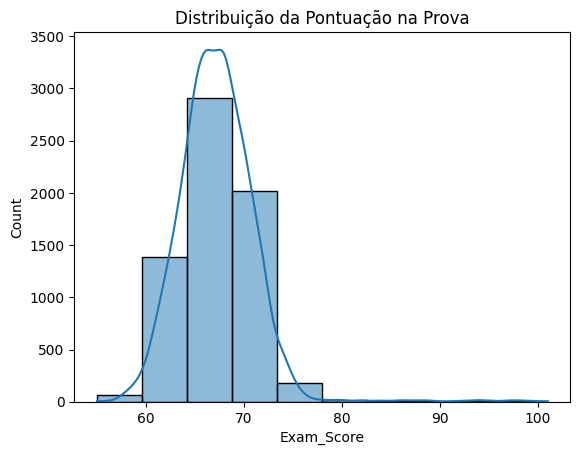

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Exam_Score'], bins=10, kde=True)
plt.title('Distribuição da Pontuação na Prova')
plt.show()

* Boxplot

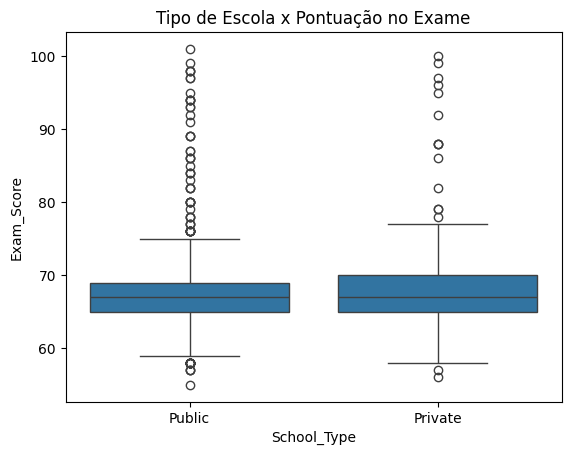

In [20]:
sns.boxplot(x='School_Type', y='Exam_Score', data=df)
plt.title('Tipo de Escola x Pontuação no Exame')
plt.show()

**Gráficos para variáveis categóricas:**

* Gráfico de Barras


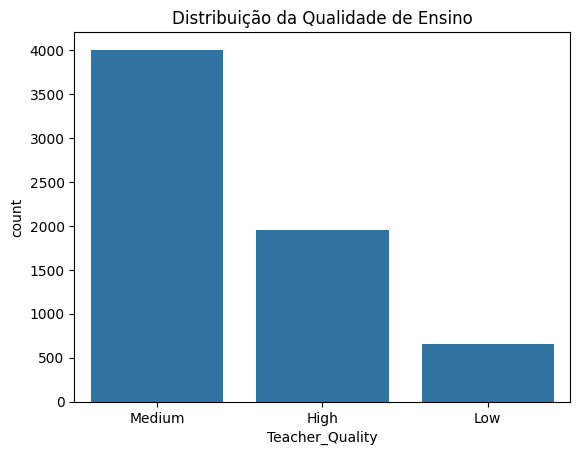

In [21]:
sns.countplot(x='Teacher_Quality', data=df)
plt.title('Distribuição da Qualidade de Ensino')
plt.show()

* Gráfico de Pizza

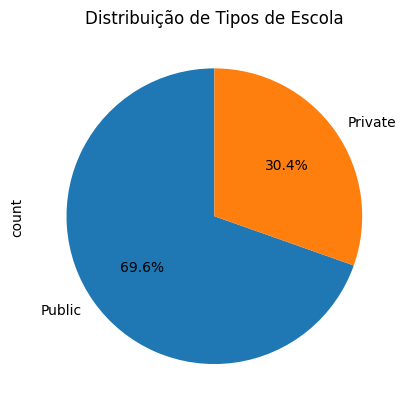

In [22]:
df['School_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Tipos de Escola')
plt.show()

**Gráficos relacionais:**

* Gráfico de Dispersão:


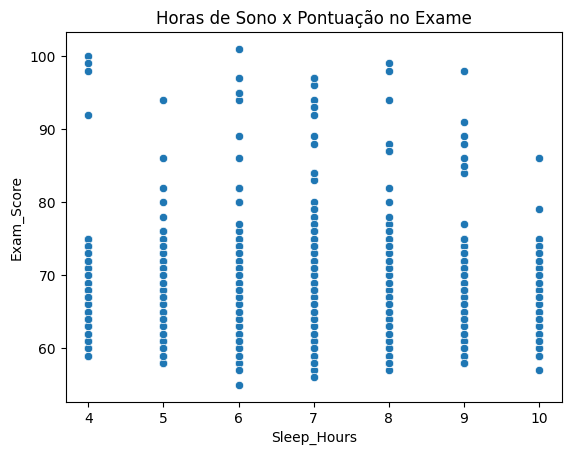

In [23]:
# Horas de Sono x Pontuação no Exame
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df)
plt.title('Horas de Sono x Pontuação no Exame')
plt.show()

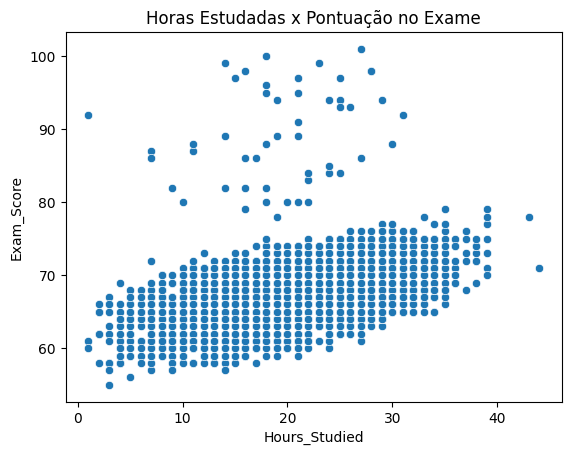

In [24]:
# Horas Estudadas x Pontuação no Exame
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Horas Estudadas x Pontuação no Exame')
plt.show()

7) CONCLUSÃO DOS DADOS OBSERVADOS

Após a exploração dos dados e a criação de gráficos, é hora de analisar os
insights obtidos.

**Atividade:** Com base nos gráficos e análises realizadas, responda às seguintes
perguntas:

1. Quais padrões você observou nas variáveis numéricas? (exemplo:
distribuição normal, outliers)


2. Como estão distribuídas as variáveis categóricas? Alguma categoria se
destaca em termos de frequência?


3. Você identificou correlações entre variáveis numéricas? Qual pode ser a
relação entre essas variáveis?


4. Com base nos dados, quais são as principais conclusões que você pode
tirar? O que essas conclusões indicam para o contexto do dataset
escolhido?